In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial.distance import pdist, squareform

In [ ]:
def run_LogisticRegression(X, y):

    lr = LogisticRegression(penalty='l2').fit(X, y)
    y_pred = lr.predict(X)
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)

    return y_pred, cm, cr

In [ ]:
def run_KernelPCA(X):

    sigma = 3

    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = np.exp(-sigma * mat_sq_dists)
    N = K.shape[0]
    U = np.ones((N,N)) / N
    Kn = K - U.dot(K) - K.dot(U) + U.dot(K).dot(U)

    eigen_values, eigen_vectors = np.linalg.eigh(K)
    eigen_vectors = eigen_vectors.T
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[i,:]) for i in range(len(eigen_values))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    eigen_values_sorted = np.array([x[0] for x in eigen_pairs])
    eigen_vectors_sorted = np.array([x[1] for x in eigen_pairs])

    # n=3
    c1 = eigen_vectors_sorted[:3,:]
    X_pc1 = Kn.dot(c1.T)

    # n=20
    c2 = eigen_vectors_sorted[:20,:]
    X_pc2 = Kn.dot(c2.T)

    # n=100
    c3 = eigen_vectors_sorted[:100,:]
    X_pc3 = Kn.dot(c3.T)
    
    return X_pc1, X_pc2, X_pc3

### Two Spirals

In [ ]:
df = pd.read_csv(
    'https://www.ccs.neu.edu/home/vip/teach/DMcourse/data/TwoSpirals/twoSpirals.txt', sep='\t', header=None, names=['x','y', 'class'])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Logistic Regression

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[326 174]
 [165 335]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.66      0.65      0.66       500
         1.0       0.66      0.67      0.66       500

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



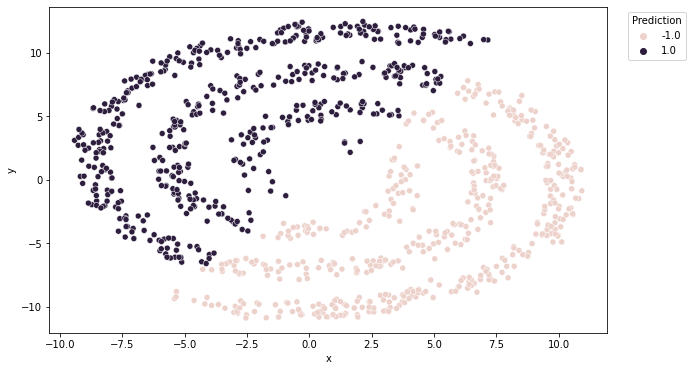

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### Kernel PCA

In [ ]:
X_pc1, X_pc2, X_pc3 = run_KernelPCA(X)

#### n=3

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc1, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[ 99 401]
 [  0 500]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

        -1.0       1.00      0.20      0.33       500
         1.0       0.55      1.00      0.71       500

    accuracy                           0.60      1000
   macro avg       0.78      0.60      0.52      1000
weighted avg       0.78      0.60      0.52      1000



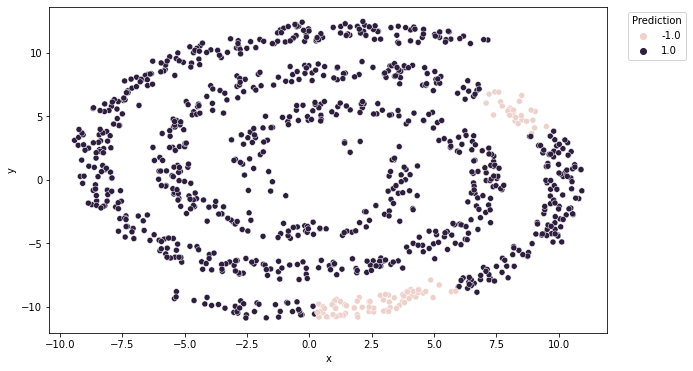

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### n=20

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc2, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[306 194]
 [  0 500]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

        -1.0       1.00      0.61      0.76       500
         1.0       0.72      1.00      0.84       500

    accuracy                           0.81      1000
   macro avg       0.86      0.81      0.80      1000
weighted avg       0.86      0.81      0.80      1000



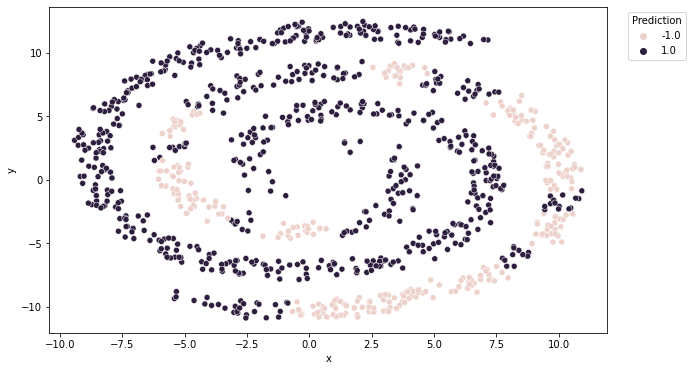

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### n=100

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc3, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[500   0]
 [  6 494]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



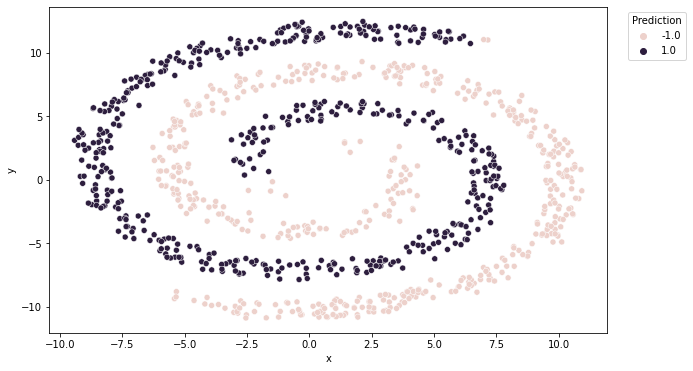

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

### Three Circles

In [ ]:
df = pd.read_csv(
    'https://www.ccs.neu.edu/home/vip/teach/DMcourse/data/TwoSpirals/threecircles.txt', sep=',', header=None, names=['x','y', 'class'])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Logistic Regression

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[ 94 106 133]
 [ 89 102 142]
 [ 82  97 155]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

          -1       0.35      0.28      0.31       333
           0       0.33      0.31      0.32       333
           1       0.36      0.46      0.41       334

    accuracy                           0.35      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.35      0.35      0.35      1000



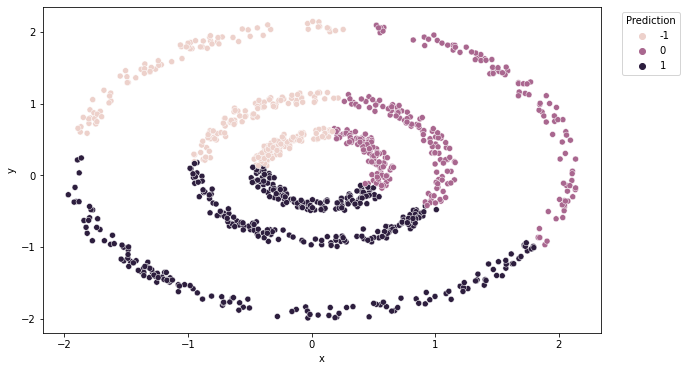

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### Kernel PCA

In [ ]:
X_pc1, X_pc2, X_pc3 = run_KernelPCA(X)

#### n=3

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc1, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[333   0   0]
 [  0 333   0]
 [  0   0 334]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       333
           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



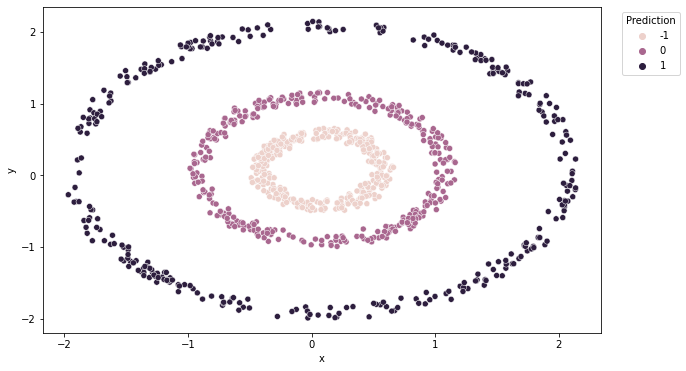

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### n=20

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc2, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[333   0   0]
 [  0 333   0]
 [  0   0 334]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       333
           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



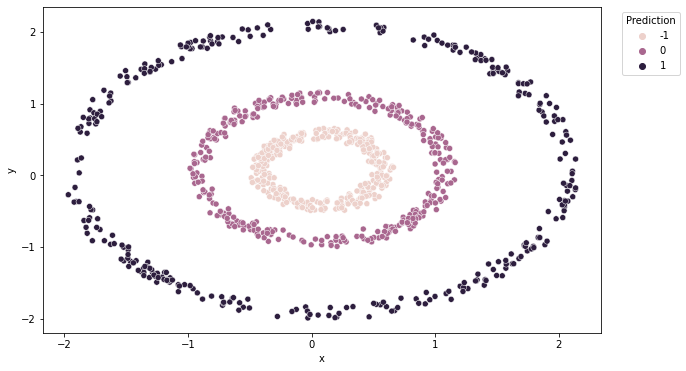

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')

#### n=100

In [ ]:
y_pred, cm, cr = run_LogisticRegression(X_pc3, y)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[333   0   0]
 [  0 333   0]
 [  0   0 334]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       333
           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



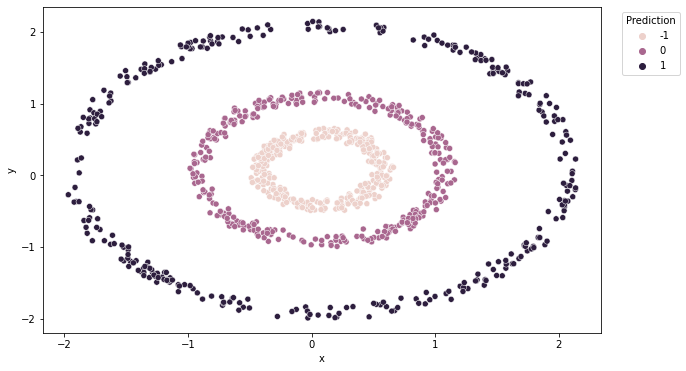

In [ ]:
pred_df = pd.DataFrame({
    'x': X['x'],
    'y': X['y'],
    'pred': y_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='x', y='y', hue='pred')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Prediction')